# TME 8: Split
> Consignes: le fichier TME8_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME8_nom1_nom2.ipynb.

N'oubliez pas de sauvegarder fréquemment votre notebook !! 


In [1]:
from PIL import Image
from pylab import *
import numpy as np

### Données
img_test = full((64,64),150,dtype=uint8)
img_test[32:48,16:16+32] = 100
img_test[8:24,40:56] = 50
angio = array(Image.open('images/angiogra.png'))
cam = array(Image.open('images/cameraman.png'))
muscle = array(Image.open('images/muscle.png'))
prisme = array(Image.open('images/prisme.png'))
seiche = array(Image.open('images/seiche.png'))

### Fonction d'affichage
def affichage_14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
    Dffectue entre 1 et 4 affichages avec leurs titres, pour des images ou courbes
    
    Paramètres :
      - liste des affichages (entre 1 et 4)
      - liste des titres (entre 1 et 4, autant que de affichages), optionnelle    
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('affichage_14 nécéssite 1 à 4 entrées en paramètre')        
        
    if nb_affichages != len(titres):
        raise ValueError('affichage_14 nécéssite autant de titres que d\'affichages')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
        if len(affichages[i].shape)==2 and affichages[i].shape[0] > 1 and affichages[i].shape[1] > 1:
            # on affiche une image
            s.imshow(affichages[i], cmap="gray",interpolation='nearest', aspect='equal')
        else :
            # il s'agit d'une seule ligne, à afficher comme une courbe
            plot(affichages[i])
            courbes=True

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    show()



## Exercice 1

Question 1: 
Écrire la fonction récursive ``split()`` vue en TD. Elle prend en entrée l'image, une région, un prédicat, et un nombre variable d'arguments. La région est de type formel Python ```Bloc``` défini par :
```python
type Bloc = tuple[int**4]
```
La fonction ``split()`` retourne un arbre 4-aire de type formel Python, défini récursivement par:
```python
type 4-aire = list[(4-aire**4|Bloc)] 
```
Le prédicat est une fonction Python de signature:
```python
Array*Bloc*...->bool
```
Elle peut prendre un nombre variable de paramètres qui correspond aux paramètres du prédicat.


In [2]:
#algorithme vu en TD
def split(I,reg,pred,*args):
    """ Array*Bloc*(Array*Bloc*...->bool)*... -> 4-aire
        Découpage de I en arbre 4-aire sur un critère d'écart-type minimal
    """
    x,y,n,m = reg
    #Divise en 4 régions l'image si le if est validé. 
    if(pred(I,reg,*args) and n >2 and m > 2):
        NO = split(I,(x,y,n//2, m//2), pred, *args)
        NE = split(I,(x,y+m//2,n//2, m//2), pred, *args)
        SO = split(I,(x+n//2,y,n//2, m//2), pred, *args)
        SE = split(I,(x+n//2,y+m//2,n//2, m//2), pred, *args)
        return [NO, NE, SO, SE]
    else :
        return [reg]


Question 2:
Écrire la fonction ```predsplit1(I,B,*args)``` de signature :
```python
Array*Bloc*... -> bool
```
qui retourne True si l'écart-type de l'image ``I`` calculé sur la région ``B`` est plus grand que la valeur du premier argument de ``*args`` (on y accède simplement par ``*args[0]``).

In [3]:
def predsplit1(I,reg,*args):
    """ Array*Bloc*... -> bool
    """ 
    
    x, y, n, m = reg
    #calcule l'ecart type de la region et compare au seuil
    return I[x:x+n,y:y+m].std() > args[0]
 

Question 3: Écrire la fonction ``splitprof(L)`` qui réaliste un parcours (récursif) en profondeur de l'arbre 4-aire passé en paramètre. La fonction retourne la liste des feuilles de ``L``, soit une liste de bloc.

In [5]:
def splitprof(L,Li):
    """ 4-aire -> list[Bloc]"""
    #retourne la liste des feuilles de L
    #fonction récursive qui teste si c'est une feuille, si oui on rend, sinon on appelle récursivement.
    if (type(L) is tuple):
        print("coord", L)
        Li.append(L)
        return L, Li
        #x,y,n,m = L[0]
        #print(L[x:x+n, y:y+m].mean())
        #print(L[x:x+n, y:y+m].std())
    else :
        for l in L :
            splitprof(l,Li)


def splitprof__(L):
    li =[]
    splitprof(L,li)
    return li

Question 4: Tester vos codes sur l'image test ``img_test`` vue en TD. Imprimer la valeur retournée par ``split()`` ainsi que celle retournée par ``profsplit()``. 

In [6]:
l = split(img_test, (0, 0, 64, 64), predsplit1, 0)
print(l)
print()
print(splitprof(l,[]))
print()
sp = splitprof__(l)
print(sp)

[[(0, 0, 32, 32)], [[[(0, 32, 8, 8)], [(0, 40, 8, 8)], [(8, 32, 8, 8)], [(8, 40, 8, 8)]], [[(0, 48, 8, 8)], [(0, 56, 8, 8)], [(8, 48, 8, 8)], [(8, 56, 8, 8)]], [[(16, 32, 8, 8)], [(16, 40, 8, 8)], [(24, 32, 8, 8)], [(24, 40, 8, 8)]], [[(16, 48, 8, 8)], [(16, 56, 8, 8)], [(24, 48, 8, 8)], [(24, 56, 8, 8)]]], [[(32, 0, 16, 16)], [(32, 16, 16, 16)], [(48, 0, 16, 16)], [(48, 16, 16, 16)]], [[(32, 32, 16, 16)], [(32, 48, 16, 16)], [(48, 32, 16, 16)], [(48, 48, 16, 16)]]]

coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 8, 8)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 8, 8)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 8, 8)
coord (24, 40, 8, 8)
coord (16, 48, 8, 8)
coord (16, 56, 8, 8)
coord (24, 48, 8, 8)
coord (24, 56, 8, 8)
coord (32, 0, 16, 16)
coord (32, 16, 16, 16)
coord (48, 0, 16, 16)
coord (48, 16, 16, 16)
coord (32, 32, 16, 16)
coord (32, 48, 16, 16)
coord (48, 32, 16, 16)
coord (48, 48, 16, 1

Question 4: Écrire la fonction ```splitdraw(L,I)``` qui prend en paramètre une liste de bloc et une image et retourne une image dont les bords de chaque éléments de ``L`` ont été dessiné en rouge. Indication: l'image retournée est une hypermatrice de dimension 3, la troisième dimension a une taille de 3 et correspond aux composantes rouge, verte et bleue d'une image RGB. Tester son bon fonctionnement sur l'exemple précédent.


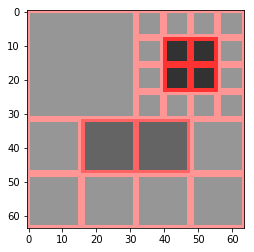

In [7]:
from PIL import Image, ImageDraw

def splitdraw(LL,I):
    """ list[Bloc]*Array -> Array
        parcours de la liste dessin des régions 
    """
    #récupère la dimension de l'image
    if(len(I.shape) == 2):
        h, w = I.shape
    else :
        h, w, z = I.shape
    #crée un nouveau tableau avec 3 canaux pour les 3 couleurs
    test = np.full((h,w,3),0)
    
    #ajoute les valeurs
    for x in range(h) :
        for y in range (w) :
            test[x,y] = I[x,y]
    #teste si c'est un bord, si oui ajout canal rouge
    for l in LL :
        x,y,n,m = l
        for i in range(x,x+n):
            for j in range(y,y+n):
                if (i == x or j == y or i == x+n-1 or j == y+m-1):
                    test[i][j][0]=255
            
            
    return test

imshow(splitdraw(sp,img_test))


Question 5: Ajouter un bruit gaussien sur l'image ``img_test`` d'écart-type 5. Recalculer un découpage 4-aire sur l'image bruitée en ajustant le seuil de façon à obtenir le même résultat que dans la question précédente. Quelle valeur de seuil a-t-il fallut choisir ? Cela vous semble-t-il cohérent ?

Indication: utiliser la fonction Numpy ``random.randn()`` qui génère des valeurs aléatoires tirées selon une loi normale (loi gaussienne de moyenne nulle et de variance 1). Pour obtenir des réalisations d'une gaussienne d'écart type $\sigma$, il suffit de faire des tirages d'une loi normale, multipliés par $\sigma$. 

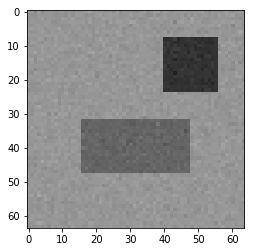

In [8]:
#dimension de l'image
h, w = img_test.shape
#déclaration nouvelle image
img_test_bruit = np.full((h,w,3),0)

for x in range(h) :
    for y in range (w) :
        #ajoute la valeur dans le tableau
        img_test_bruit[x,y] = img_test[x,y]
        #ajoute le bruit gaussien
        img_test_bruit[x][y] += int(5*np.random.randn()) 
        
imshow(img_test_bruit)

coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 2, 2)
coord (0, 42, 2, 2)
coord (2, 40, 2, 2)
coord (2, 42, 2, 2)
coord (0, 44, 4, 4)
coord (4, 40, 4, 4)
coord (4, 44, 4, 4)
coord (8, 32, 8, 8)
coord (8, 40, 2, 2)
coord (8, 42, 2, 2)
coord (10, 40, 2, 2)
coord (10, 42, 2, 2)
coord (8, 44, 2, 2)
coord (8, 46, 2, 2)
coord (10, 44, 2, 2)
coord (10, 46, 2, 2)
coord (12, 40, 2, 2)
coord (12, 42, 2, 2)
coord (14, 40, 2, 2)
coord (14, 42, 2, 2)
coord (12, 44, 4, 4)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 2, 2)
coord (8, 58, 2, 2)
coord (10, 56, 2, 2)
coord (10, 58, 2, 2)
coord (8, 60, 2, 2)
coord (8, 62, 2, 2)
coord (10, 60, 2, 2)
coord (10, 62, 2, 2)
coord (12, 56, 2, 2)
coord (12, 58, 2, 2)
coord (14, 56, 2, 2)
coord (14, 58, 2, 2)
coord (12, 60, 2, 2)
coord (12, 62, 2, 2)
coord (14, 60, 2, 2)
coord (14, 62, 2, 2)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 4, 4)
coord (24, 36, 4, 4)
coord (28, 32, 2, 2)
coord (28, 34, 2, 2)
coord (30, 3

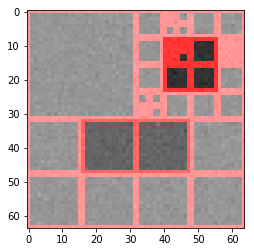

In [10]:
#rend un 4-aire
split_bruit = split(img_test_bruit,(0,0,h,w),predsplit1,5)
#rend les feuilles
split_prof_bruit = splitprof__(split_bruit)
#ajoute les lignes rouges
res = splitdraw(split_prof_bruit,img_test_bruit)
imshow(res)

coord (0, 0, 32, 32)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 2, 2)
coord (8, 42, 2, 2)
coord (10, 40, 2, 2)
coord (10, 42, 2, 2)
coord (8, 44, 4, 4)
coord (12, 40, 2, 2)
coord (12, 42, 2, 2)
coord (14, 40, 2, 2)
coord (14, 42, 2, 2)
coord (12, 44, 4, 4)
coord (0, 48, 8, 8)
coord (0, 56, 8, 8)
coord (8, 48, 8, 8)
coord (8, 56, 2, 2)
coord (8, 58, 2, 2)
coord (10, 56, 2, 2)
coord (10, 58, 2, 2)
coord (8, 60, 2, 2)
coord (8, 62, 2, 2)
coord (10, 60, 2, 2)
coord (10, 62, 2, 2)
coord (12, 56, 4, 4)
coord (12, 60, 4, 4)
coord (16, 32, 8, 8)
coord (16, 40, 8, 8)
coord (24, 32, 8, 8)
coord (24, 40, 8, 8)
coord (16, 48, 8, 8)
coord (16, 56, 8, 8)
coord (24, 48, 8, 8)
coord (24, 56, 8, 8)
coord (32, 0, 16, 16)
coord (32, 16, 16, 16)
coord (48, 0, 16, 16)
coord (48, 16, 16, 16)
coord (32, 32, 16, 16)
coord (32, 48, 16, 16)
coord (48, 32, 16, 16)
coord (48, 48, 16, 16)


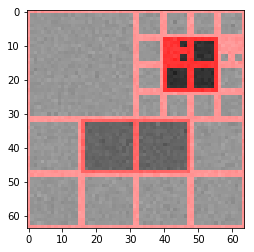

In [11]:
split_bruit = split(img_test_bruit,(0,0,h,w),predsplit1,5.5)
split_prof_bruit = splitprof__(split_bruit)
res = splitdraw(split_prof_bruit,img_test_bruit)
imshow(res)

#On remarque donc qu'il faut un seuil supérieur à 5.

# Exercice 2
Question 1:
Expérimenter l'algorithme de split sur les 4 images naturelles fournie. Pour chaque image essayer de trouver le seuil qui vous semble visuellement le meilleur. Afficher le nombre de bloc obtenus après découpage.

coord (0, 0, 64, 64)
coord (0, 64, 8, 8)
coord (0, 72, 2, 2)
coord (0, 74, 2, 2)
coord (2, 72, 2, 2)
coord (2, 74, 2, 2)
coord (0, 76, 2, 2)
coord (0, 78, 2, 2)
coord (2, 76, 2, 2)
coord (2, 78, 2, 2)
coord (4, 72, 2, 2)
coord (4, 74, 2, 2)
coord (6, 72, 2, 2)
coord (6, 74, 2, 2)
coord (4, 76, 2, 2)
coord (4, 78, 2, 2)
coord (6, 76, 2, 2)
coord (6, 78, 2, 2)
coord (8, 64, 8, 8)
coord (8, 72, 2, 2)
coord (8, 74, 2, 2)
coord (10, 72, 2, 2)
coord (10, 74, 2, 2)
coord (8, 76, 2, 2)
coord (8, 78, 2, 2)
coord (10, 76, 2, 2)
coord (10, 78, 2, 2)
coord (12, 72, 2, 2)
coord (12, 74, 2, 2)
coord (14, 72, 2, 2)
coord (14, 74, 2, 2)
coord (12, 76, 2, 2)
coord (12, 78, 2, 2)
coord (14, 76, 2, 2)
coord (14, 78, 2, 2)
coord (0, 80, 4, 4)
coord (0, 84, 4, 4)
coord (4, 80, 4, 4)
coord (4, 84, 4, 4)
coord (0, 88, 8, 8)
coord (8, 80, 2, 2)
coord (8, 82, 2, 2)
coord (10, 80, 2, 2)
coord (10, 82, 2, 2)
coord (8, 84, 2, 2)
coord (8, 86, 2, 2)
coord (10, 84, 2, 2)
coord (10, 86, 2, 2)
coord (12, 80, 4, 4)
co

coord (108, 156, 4, 4)
coord (112, 128, 8, 8)
coord (112, 136, 8, 8)
coord (120, 128, 4, 4)
coord (120, 132, 4, 4)
coord (124, 128, 4, 4)
coord (124, 132, 2, 2)
coord (124, 134, 2, 2)
coord (126, 132, 2, 2)
coord (126, 134, 2, 2)
coord (120, 136, 8, 8)
coord (112, 144, 16, 16)
coord (96, 160, 8, 8)
coord (96, 168, 8, 8)
coord (104, 160, 8, 8)
coord (104, 168, 8, 8)
coord (96, 176, 8, 8)
coord (96, 184, 8, 8)
coord (104, 176, 8, 8)
coord (104, 184, 8, 8)
coord (112, 160, 16, 16)
coord (112, 176, 16, 16)
coord (64, 192, 64, 64)
coord (128, 0, 16, 16)
coord (128, 16, 16, 16)
coord (144, 0, 16, 16)
coord (144, 16, 8, 8)
coord (144, 24, 2, 2)
coord (144, 26, 2, 2)
coord (146, 24, 2, 2)
coord (146, 26, 2, 2)
coord (144, 28, 4, 4)
coord (148, 24, 4, 4)
coord (148, 28, 4, 4)
coord (152, 16, 8, 8)
coord (152, 24, 8, 8)
coord (128, 32, 4, 4)
coord (128, 36, 2, 2)
coord (128, 38, 2, 2)
coord (130, 36, 2, 2)
coord (130, 38, 2, 2)
coord (132, 32, 4, 4)
coord (132, 36, 4, 4)
coord (128, 40, 2, 2)
co

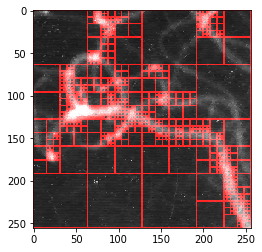

In [12]:
#Image angio
h, w = angio.shape
split_bruit_angio = split(angio,(0,0,h,w),predsplit1,20)
split_prof_bruit_angio = splitprof__(split_bruit_angio)
res = splitdraw(split_prof_bruit_angio,angio)
imshow(res)

coord (0, 0, 64, 64)
coord (0, 64, 32, 32)
coord (0, 96, 32, 32)
coord (32, 64, 32, 32)
coord (32, 96, 8, 8)
coord (32, 104, 4, 4)
coord (32, 108, 4, 4)
coord (36, 104, 2, 2)
coord (36, 106, 2, 2)
coord (38, 104, 2, 2)
coord (38, 106, 2, 2)
coord (36, 108, 2, 2)
coord (36, 110, 2, 2)
coord (38, 108, 2, 2)
coord (38, 110, 2, 2)
coord (40, 96, 4, 4)
coord (40, 100, 2, 2)
coord (40, 102, 2, 2)
coord (42, 100, 2, 2)
coord (42, 102, 2, 2)
coord (44, 96, 2, 2)
coord (44, 98, 2, 2)
coord (46, 96, 2, 2)
coord (46, 98, 2, 2)
coord (44, 100, 2, 2)
coord (44, 102, 2, 2)
coord (46, 100, 2, 2)
coord (46, 102, 2, 2)
coord (40, 104, 8, 8)
coord (32, 112, 4, 4)
coord (32, 116, 4, 4)
coord (36, 112, 2, 2)
coord (36, 114, 2, 2)
coord (38, 112, 2, 2)
coord (38, 114, 2, 2)
coord (36, 116, 2, 2)
coord (36, 118, 2, 2)
coord (38, 116, 2, 2)
coord (38, 118, 2, 2)
coord (32, 120, 4, 4)
coord (32, 124, 4, 4)
coord (36, 120, 2, 2)
coord (36, 122, 2, 2)
coord (38, 120, 2, 2)
coord (38, 122, 2, 2)
coord (36, 124, 

coord (86, 158, 2, 2)
coord (88, 144, 2, 2)
coord (88, 146, 2, 2)
coord (90, 144, 2, 2)
coord (90, 146, 2, 2)
coord (88, 148, 2, 2)
coord (88, 150, 2, 2)
coord (90, 148, 2, 2)
coord (90, 150, 2, 2)
coord (92, 144, 2, 2)
coord (92, 146, 2, 2)
coord (94, 144, 2, 2)
coord (94, 146, 2, 2)
coord (92, 148, 2, 2)
coord (92, 150, 2, 2)
coord (94, 148, 2, 2)
coord (94, 150, 2, 2)
coord (88, 152, 4, 4)
coord (88, 156, 4, 4)
coord (92, 152, 2, 2)
coord (92, 154, 2, 2)
coord (94, 152, 2, 2)
coord (94, 154, 2, 2)
coord (92, 156, 4, 4)
coord (64, 160, 2, 2)
coord (64, 162, 2, 2)
coord (66, 160, 2, 2)
coord (66, 162, 2, 2)
coord (64, 164, 4, 4)
coord (68, 160, 2, 2)
coord (68, 162, 2, 2)
coord (70, 160, 2, 2)
coord (70, 162, 2, 2)
coord (68, 164, 4, 4)
coord (64, 168, 8, 8)
coord (72, 160, 2, 2)
coord (72, 162, 2, 2)
coord (74, 160, 2, 2)
coord (74, 162, 2, 2)
coord (72, 164, 2, 2)
coord (72, 166, 2, 2)
coord (74, 164, 2, 2)
coord (74, 166, 2, 2)
coord (76, 160, 2, 2)
coord (76, 162, 2, 2)
coord (78,

coord (178, 126, 2, 2)
coord (180, 120, 2, 2)
coord (180, 122, 2, 2)
coord (182, 120, 2, 2)
coord (182, 122, 2, 2)
coord (180, 124, 2, 2)
coord (180, 126, 2, 2)
coord (182, 124, 2, 2)
coord (182, 126, 2, 2)
coord (184, 112, 2, 2)
coord (184, 114, 2, 2)
coord (186, 112, 2, 2)
coord (186, 114, 2, 2)
coord (184, 116, 2, 2)
coord (184, 118, 2, 2)
coord (186, 116, 2, 2)
coord (186, 118, 2, 2)
coord (188, 112, 2, 2)
coord (188, 114, 2, 2)
coord (190, 112, 2, 2)
coord (190, 114, 2, 2)
coord (188, 116, 2, 2)
coord (188, 118, 2, 2)
coord (190, 116, 2, 2)
coord (190, 118, 2, 2)
coord (184, 120, 2, 2)
coord (184, 122, 2, 2)
coord (186, 120, 2, 2)
coord (186, 122, 2, 2)
coord (184, 124, 4, 4)
coord (188, 120, 2, 2)
coord (188, 122, 2, 2)
coord (190, 120, 2, 2)
coord (190, 122, 2, 2)
coord (188, 124, 4, 4)
coord (192, 0, 16, 16)
coord (192, 16, 8, 8)
coord (192, 24, 2, 2)
coord (192, 26, 2, 2)
coord (194, 24, 2, 2)
coord (194, 26, 2, 2)
coord (192, 28, 4, 4)
coord (196, 24, 4, 4)
coord (196, 28, 2,

coord (134, 130, 2, 2)
coord (132, 132, 2, 2)
coord (132, 134, 2, 2)
coord (134, 132, 2, 2)
coord (134, 134, 2, 2)
coord (128, 136, 2, 2)
coord (128, 138, 2, 2)
coord (130, 136, 2, 2)
coord (130, 138, 2, 2)
coord (128, 140, 4, 4)
coord (132, 136, 2, 2)
coord (132, 138, 2, 2)
coord (134, 136, 2, 2)
coord (134, 138, 2, 2)
coord (132, 140, 4, 4)
coord (136, 128, 2, 2)
coord (136, 130, 2, 2)
coord (138, 128, 2, 2)
coord (138, 130, 2, 2)
coord (136, 132, 2, 2)
coord (136, 134, 2, 2)
coord (138, 132, 2, 2)
coord (138, 134, 2, 2)
coord (140, 128, 2, 2)
coord (140, 130, 2, 2)
coord (142, 128, 2, 2)
coord (142, 130, 2, 2)
coord (140, 132, 2, 2)
coord (140, 134, 2, 2)
coord (142, 132, 2, 2)
coord (142, 134, 2, 2)
coord (136, 136, 2, 2)
coord (136, 138, 2, 2)
coord (138, 136, 2, 2)
coord (138, 138, 2, 2)
coord (136, 140, 4, 4)
coord (140, 136, 2, 2)
coord (140, 138, 2, 2)
coord (142, 136, 2, 2)
coord (142, 138, 2, 2)
coord (140, 140, 4, 4)
coord (128, 144, 2, 2)
coord (128, 146, 2, 2)
coord (130,

coord (200, 182, 2, 2)
coord (202, 180, 2, 2)
coord (202, 182, 2, 2)
coord (204, 176, 2, 2)
coord (204, 178, 2, 2)
coord (206, 176, 2, 2)
coord (206, 178, 2, 2)
coord (204, 180, 2, 2)
coord (204, 182, 2, 2)
coord (206, 180, 2, 2)
coord (206, 182, 2, 2)
coord (200, 184, 4, 4)
coord (200, 188, 4, 4)
coord (204, 184, 2, 2)
coord (204, 186, 2, 2)
coord (206, 184, 2, 2)
coord (206, 186, 2, 2)
coord (204, 188, 4, 4)
coord (208, 160, 16, 16)
coord (208, 176, 4, 4)
coord (208, 180, 2, 2)
coord (208, 182, 2, 2)
coord (210, 180, 2, 2)
coord (210, 182, 2, 2)
coord (212, 176, 4, 4)
coord (212, 180, 2, 2)
coord (212, 182, 2, 2)
coord (214, 180, 2, 2)
coord (214, 182, 2, 2)
coord (208, 184, 2, 2)
coord (208, 186, 2, 2)
coord (210, 184, 2, 2)
coord (210, 186, 2, 2)
coord (208, 188, 4, 4)
coord (212, 184, 4, 4)
coord (212, 188, 2, 2)
coord (212, 190, 2, 2)
coord (214, 188, 2, 2)
coord (214, 190, 2, 2)
coord (216, 176, 8, 8)
coord (216, 184, 2, 2)
coord (216, 186, 2, 2)
coord (218, 184, 2, 2)
coord (21

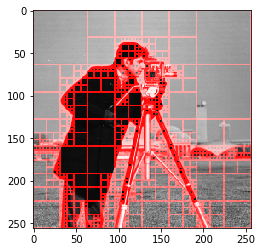

In [13]:
#Image cam
h, w = cam.shape
split_bruit_cam = split(cam,(0,0,h,w),predsplit1,20)
split_prof_bruit_cam = splitprof__(split_bruit_cam)
res = splitdraw(split_prof_bruit_cam,cam)
imshow(res)

coord (0, 0, 32, 32)
coord (0, 32, 16, 16)
coord (0, 48, 16, 16)
coord (16, 32, 16, 16)
coord (16, 48, 8, 8)
coord (16, 56, 2, 2)
coord (16, 58, 2, 2)
coord (18, 56, 2, 2)
coord (18, 58, 2, 2)
coord (16, 60, 2, 2)
coord (16, 62, 2, 2)
coord (18, 60, 2, 2)
coord (18, 62, 2, 2)
coord (20, 56, 2, 2)
coord (20, 58, 2, 2)
coord (22, 56, 2, 2)
coord (22, 58, 2, 2)
coord (20, 60, 4, 4)
coord (24, 48, 8, 8)
coord (24, 56, 2, 2)
coord (24, 58, 2, 2)
coord (26, 56, 2, 2)
coord (26, 58, 2, 2)
coord (24, 60, 2, 2)
coord (24, 62, 2, 2)
coord (26, 60, 2, 2)
coord (26, 62, 2, 2)
coord (28, 56, 2, 2)
coord (28, 58, 2, 2)
coord (30, 56, 2, 2)
coord (30, 58, 2, 2)
coord (28, 60, 4, 4)
coord (32, 0, 8, 8)
coord (32, 8, 8, 8)
coord (40, 0, 2, 2)
coord (40, 2, 2, 2)
coord (42, 0, 2, 2)
coord (42, 2, 2, 2)
coord (40, 4, 4, 4)
coord (44, 0, 2, 2)
coord (44, 2, 2, 2)
coord (46, 0, 2, 2)
coord (46, 2, 2, 2)
coord (44, 4, 2, 2)
coord (44, 6, 2, 2)
coord (46, 4, 2, 2)
coord (46, 6, 2, 2)
coord (40, 8, 4, 4)
coor

coord (30, 234, 2, 2)
coord (28, 236, 4, 4)
coord (16, 240, 8, 8)
coord (16, 248, 4, 4)
coord (16, 252, 4, 4)
coord (20, 248, 2, 2)
coord (20, 250, 2, 2)
coord (22, 248, 2, 2)
coord (22, 250, 2, 2)
coord (20, 252, 2, 2)
coord (20, 254, 2, 2)
coord (22, 252, 2, 2)
coord (22, 254, 2, 2)
coord (24, 240, 8, 8)
coord (24, 248, 4, 4)
coord (24, 252, 4, 4)
coord (28, 248, 4, 4)
coord (28, 252, 2, 2)
coord (28, 254, 2, 2)
coord (30, 252, 2, 2)
coord (30, 254, 2, 2)
coord (32, 192, 8, 8)
coord (32, 200, 4, 4)
coord (32, 204, 2, 2)
coord (32, 206, 2, 2)
coord (34, 204, 2, 2)
coord (34, 206, 2, 2)
coord (36, 200, 4, 4)
coord (36, 204, 4, 4)
coord (40, 192, 4, 4)
coord (40, 196, 4, 4)
coord (44, 192, 4, 4)
coord (44, 196, 4, 4)
coord (40, 200, 8, 8)
coord (32, 208, 8, 8)
coord (32, 216, 4, 4)
coord (32, 220, 2, 2)
coord (32, 222, 2, 2)
coord (34, 220, 2, 2)
coord (34, 222, 2, 2)
coord (36, 216, 4, 4)
coord (36, 220, 2, 2)
coord (36, 222, 2, 2)
coord (38, 220, 2, 2)
coord (38, 222, 2, 2)
coord (40,

coord (120, 242, 2, 2)
coord (122, 240, 2, 2)
coord (122, 242, 2, 2)
coord (120, 244, 4, 4)
coord (124, 240, 4, 4)
coord (124, 244, 2, 2)
coord (124, 246, 2, 2)
coord (126, 244, 2, 2)
coord (126, 246, 2, 2)
coord (120, 248, 8, 8)
coord (128, 0, 4, 4)
coord (128, 4, 4, 4)
coord (132, 0, 4, 4)
coord (132, 4, 4, 4)
coord (128, 8, 4, 4)
coord (128, 12, 2, 2)
coord (128, 14, 2, 2)
coord (130, 12, 2, 2)
coord (130, 14, 2, 2)
coord (132, 8, 4, 4)
coord (132, 12, 4, 4)
coord (136, 0, 8, 8)
coord (136, 8, 8, 8)
coord (128, 16, 8, 8)
coord (128, 24, 8, 8)
coord (136, 16, 2, 2)
coord (136, 18, 2, 2)
coord (138, 16, 2, 2)
coord (138, 18, 2, 2)
coord (136, 20, 4, 4)
coord (140, 16, 4, 4)
coord (140, 20, 2, 2)
coord (140, 22, 2, 2)
coord (142, 20, 2, 2)
coord (142, 22, 2, 2)
coord (136, 24, 4, 4)
coord (136, 28, 4, 4)
coord (140, 24, 2, 2)
coord (140, 26, 2, 2)
coord (142, 24, 2, 2)
coord (142, 26, 2, 2)
coord (140, 28, 2, 2)
coord (140, 30, 2, 2)
coord (142, 28, 2, 2)
coord (142, 30, 2, 2)
coord (1

coord (214, 98, 2, 2)
coord (212, 100, 4, 4)
coord (208, 104, 8, 8)
coord (216, 96, 2, 2)
coord (216, 98, 2, 2)
coord (218, 96, 2, 2)
coord (218, 98, 2, 2)
coord (216, 100, 2, 2)
coord (216, 102, 2, 2)
coord (218, 100, 2, 2)
coord (218, 102, 2, 2)
coord (220, 96, 4, 4)
coord (220, 100, 4, 4)
coord (216, 104, 2, 2)
coord (216, 106, 2, 2)
coord (218, 104, 2, 2)
coord (218, 106, 2, 2)
coord (216, 108, 2, 2)
coord (216, 110, 2, 2)
coord (218, 108, 2, 2)
coord (218, 110, 2, 2)
coord (220, 104, 2, 2)
coord (220, 106, 2, 2)
coord (222, 104, 2, 2)
coord (222, 106, 2, 2)
coord (220, 108, 4, 4)
coord (208, 112, 2, 2)
coord (208, 114, 2, 2)
coord (210, 112, 2, 2)
coord (210, 114, 2, 2)
coord (208, 116, 4, 4)
coord (212, 112, 2, 2)
coord (212, 114, 2, 2)
coord (214, 112, 2, 2)
coord (214, 114, 2, 2)
coord (212, 116, 2, 2)
coord (212, 118, 2, 2)
coord (214, 116, 2, 2)
coord (214, 118, 2, 2)
coord (208, 120, 8, 8)
coord (216, 112, 8, 8)
coord (216, 120, 4, 4)
coord (216, 124, 2, 2)
coord (216, 126, 

coord (252, 178, 2, 2)
coord (254, 176, 2, 2)
coord (254, 178, 2, 2)
coord (252, 180, 2, 2)
coord (252, 182, 2, 2)
coord (254, 180, 2, 2)
coord (254, 182, 2, 2)
coord (248, 184, 4, 4)
coord (248, 188, 2, 2)
coord (248, 190, 2, 2)
coord (250, 188, 2, 2)
coord (250, 190, 2, 2)
coord (252, 184, 2, 2)
coord (252, 186, 2, 2)
coord (254, 184, 2, 2)
coord (254, 186, 2, 2)
coord (252, 188, 2, 2)
coord (252, 190, 2, 2)
coord (254, 188, 2, 2)
coord (254, 190, 2, 2)
coord (192, 192, 16, 16)
coord (192, 208, 16, 16)
coord (208, 192, 8, 8)
coord (208, 200, 4, 4)
coord (208, 204, 2, 2)
coord (208, 206, 2, 2)
coord (210, 204, 2, 2)
coord (210, 206, 2, 2)
coord (212, 200, 4, 4)
coord (212, 204, 2, 2)
coord (212, 206, 2, 2)
coord (214, 204, 2, 2)
coord (214, 206, 2, 2)
coord (216, 192, 4, 4)
coord (216, 196, 2, 2)
coord (216, 198, 2, 2)
coord (218, 196, 2, 2)
coord (218, 198, 2, 2)
coord (220, 192, 2, 2)
coord (220, 194, 2, 2)
coord (222, 192, 2, 2)
coord (222, 194, 2, 2)
coord (220, 196, 4, 4)
coord (

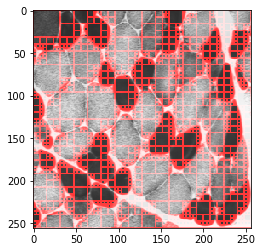

In [14]:
#Image muscle
h, w = muscle.shape
split_bruit_muscle = split(muscle,(0,0,h,w),predsplit1,25)
split_prof_bruit_muscle = splitprof__(split_bruit_muscle)
res = splitdraw(split_prof_bruit_muscle,muscle)
imshow(res)

coord (0, 0, 16, 16)
coord (0, 16, 2, 2)
coord (0, 18, 2, 2)
coord (2, 16, 2, 2)
coord (2, 18, 2, 2)
coord (0, 20, 4, 4)
coord (4, 16, 2, 2)
coord (4, 18, 2, 2)
coord (6, 16, 2, 2)
coord (6, 18, 2, 2)
coord (4, 20, 2, 2)
coord (4, 22, 2, 2)
coord (6, 20, 2, 2)
coord (6, 22, 2, 2)
coord (0, 24, 8, 8)
coord (8, 16, 8, 8)
coord (8, 24, 2, 2)
coord (8, 26, 2, 2)
coord (10, 24, 2, 2)
coord (10, 26, 2, 2)
coord (8, 28, 4, 4)
coord (12, 24, 4, 4)
coord (12, 28, 4, 4)
coord (16, 0, 16, 16)
coord (16, 16, 16, 16)
coord (0, 32, 8, 8)
coord (0, 40, 8, 8)
coord (8, 32, 8, 8)
coord (8, 40, 4, 4)
coord (8, 44, 2, 2)
coord (8, 46, 2, 2)
coord (10, 44, 2, 2)
coord (10, 46, 2, 2)
coord (12, 40, 2, 2)
coord (12, 42, 2, 2)
coord (14, 40, 2, 2)
coord (14, 42, 2, 2)
coord (12, 44, 2, 2)
coord (12, 46, 2, 2)
coord (14, 44, 2, 2)
coord (14, 46, 2, 2)
coord (0, 48, 4, 4)
coord (0, 52, 2, 2)
coord (0, 54, 2, 2)
coord (2, 52, 2, 2)
coord (2, 54, 2, 2)
coord (4, 48, 2, 2)
coord (4, 50, 2, 2)
coord (6, 48, 2, 2)


coord (80, 96, 16, 16)
coord (80, 112, 2, 2)
coord (80, 114, 2, 2)
coord (82, 112, 2, 2)
coord (82, 114, 2, 2)
coord (80, 116, 2, 2)
coord (80, 118, 2, 2)
coord (82, 116, 2, 2)
coord (82, 118, 2, 2)
coord (84, 112, 2, 2)
coord (84, 114, 2, 2)
coord (86, 112, 2, 2)
coord (86, 114, 2, 2)
coord (84, 116, 2, 2)
coord (84, 118, 2, 2)
coord (86, 116, 2, 2)
coord (86, 118, 2, 2)
coord (80, 120, 2, 2)
coord (80, 122, 2, 2)
coord (82, 120, 2, 2)
coord (82, 122, 2, 2)
coord (80, 124, 2, 2)
coord (80, 126, 2, 2)
coord (82, 124, 2, 2)
coord (82, 126, 2, 2)
coord (84, 120, 2, 2)
coord (84, 122, 2, 2)
coord (86, 120, 2, 2)
coord (86, 122, 2, 2)
coord (84, 124, 2, 2)
coord (84, 126, 2, 2)
coord (86, 124, 2, 2)
coord (86, 126, 2, 2)
coord (88, 112, 2, 2)
coord (88, 114, 2, 2)
coord (90, 112, 2, 2)
coord (90, 114, 2, 2)
coord (88, 116, 2, 2)
coord (88, 118, 2, 2)
coord (90, 116, 2, 2)
coord (90, 118, 2, 2)
coord (92, 112, 2, 2)
coord (92, 114, 2, 2)
coord (94, 112, 2, 2)
coord (94, 114, 2, 2)
coord (92

coord (8, 248, 8, 8)
coord (16, 224, 2, 2)
coord (16, 226, 2, 2)
coord (18, 224, 2, 2)
coord (18, 226, 2, 2)
coord (16, 228, 2, 2)
coord (16, 230, 2, 2)
coord (18, 228, 2, 2)
coord (18, 230, 2, 2)
coord (20, 224, 2, 2)
coord (20, 226, 2, 2)
coord (22, 224, 2, 2)
coord (22, 226, 2, 2)
coord (20, 228, 2, 2)
coord (20, 230, 2, 2)
coord (22, 228, 2, 2)
coord (22, 230, 2, 2)
coord (16, 232, 8, 8)
coord (24, 224, 2, 2)
coord (24, 226, 2, 2)
coord (26, 224, 2, 2)
coord (26, 226, 2, 2)
coord (24, 228, 2, 2)
coord (24, 230, 2, 2)
coord (26, 228, 2, 2)
coord (26, 230, 2, 2)
coord (28, 224, 4, 4)
coord (28, 228, 2, 2)
coord (28, 230, 2, 2)
coord (30, 228, 2, 2)
coord (30, 230, 2, 2)
coord (24, 232, 2, 2)
coord (24, 234, 2, 2)
coord (26, 232, 2, 2)
coord (26, 234, 2, 2)
coord (24, 236, 4, 4)
coord (28, 232, 2, 2)
coord (28, 234, 2, 2)
coord (30, 232, 2, 2)
coord (30, 234, 2, 2)
coord (28, 236, 4, 4)
coord (16, 240, 16, 16)
coord (32, 192, 2, 2)
coord (32, 194, 2, 2)
coord (34, 192, 2, 2)
coord (34

coord (96, 244, 2, 2)
coord (96, 246, 2, 2)
coord (98, 244, 2, 2)
coord (98, 246, 2, 2)
coord (100, 240, 4, 4)
coord (100, 244, 4, 4)
coord (96, 248, 2, 2)
coord (96, 250, 2, 2)
coord (98, 248, 2, 2)
coord (98, 250, 2, 2)
coord (96, 252, 4, 4)
coord (100, 248, 4, 4)
coord (100, 252, 2, 2)
coord (100, 254, 2, 2)
coord (102, 252, 2, 2)
coord (102, 254, 2, 2)
coord (104, 240, 8, 8)
coord (104, 248, 4, 4)
coord (104, 252, 2, 2)
coord (104, 254, 2, 2)
coord (106, 252, 2, 2)
coord (106, 254, 2, 2)
coord (108, 248, 4, 4)
coord (108, 252, 4, 4)
coord (112, 224, 4, 4)
coord (112, 228, 2, 2)
coord (112, 230, 2, 2)
coord (114, 228, 2, 2)
coord (114, 230, 2, 2)
coord (116, 224, 4, 4)
coord (116, 228, 2, 2)
coord (116, 230, 2, 2)
coord (118, 228, 2, 2)
coord (118, 230, 2, 2)
coord (112, 232, 2, 2)
coord (112, 234, 2, 2)
coord (114, 232, 2, 2)
coord (114, 234, 2, 2)
coord (112, 236, 4, 4)
coord (116, 232, 2, 2)
coord (116, 234, 2, 2)
coord (118, 232, 2, 2)
coord (118, 234, 2, 2)
coord (116, 236, 4, 

coord (206, 18, 2, 2)
coord (204, 20, 4, 4)
coord (200, 24, 2, 2)
coord (200, 26, 2, 2)
coord (202, 24, 2, 2)
coord (202, 26, 2, 2)
coord (200, 28, 2, 2)
coord (200, 30, 2, 2)
coord (202, 28, 2, 2)
coord (202, 30, 2, 2)
coord (204, 24, 4, 4)
coord (204, 28, 4, 4)
coord (208, 0, 4, 4)
coord (208, 4, 2, 2)
coord (208, 6, 2, 2)
coord (210, 4, 2, 2)
coord (210, 6, 2, 2)
coord (212, 0, 4, 4)
coord (212, 4, 2, 2)
coord (212, 6, 2, 2)
coord (214, 4, 2, 2)
coord (214, 6, 2, 2)
coord (208, 8, 2, 2)
coord (208, 10, 2, 2)
coord (210, 8, 2, 2)
coord (210, 10, 2, 2)
coord (208, 12, 4, 4)
coord (212, 8, 2, 2)
coord (212, 10, 2, 2)
coord (214, 8, 2, 2)
coord (214, 10, 2, 2)
coord (212, 12, 4, 4)
coord (216, 0, 2, 2)
coord (216, 2, 2, 2)
coord (218, 0, 2, 2)
coord (218, 2, 2, 2)
coord (216, 4, 2, 2)
coord (216, 6, 2, 2)
coord (218, 4, 2, 2)
coord (218, 6, 2, 2)
coord (220, 0, 2, 2)
coord (220, 2, 2, 2)
coord (222, 0, 2, 2)
coord (222, 2, 2, 2)
coord (220, 4, 2, 2)
coord (220, 6, 2, 2)
coord (222, 4, 2

coord (168, 140, 4, 4)
coord (172, 136, 2, 2)
coord (172, 138, 2, 2)
coord (174, 136, 2, 2)
coord (174, 138, 2, 2)
coord (172, 140, 2, 2)
coord (172, 142, 2, 2)
coord (174, 140, 2, 2)
coord (174, 142, 2, 2)
coord (160, 144, 4, 4)
coord (160, 148, 2, 2)
coord (160, 150, 2, 2)
coord (162, 148, 2, 2)
coord (162, 150, 2, 2)
coord (164, 144, 4, 4)
coord (164, 148, 2, 2)
coord (164, 150, 2, 2)
coord (166, 148, 2, 2)
coord (166, 150, 2, 2)
coord (160, 152, 2, 2)
coord (160, 154, 2, 2)
coord (162, 152, 2, 2)
coord (162, 154, 2, 2)
coord (160, 156, 2, 2)
coord (160, 158, 2, 2)
coord (162, 156, 2, 2)
coord (162, 158, 2, 2)
coord (164, 152, 2, 2)
coord (164, 154, 2, 2)
coord (166, 152, 2, 2)
coord (166, 154, 2, 2)
coord (164, 156, 2, 2)
coord (164, 158, 2, 2)
coord (166, 156, 2, 2)
coord (166, 158, 2, 2)
coord (168, 144, 2, 2)
coord (168, 146, 2, 2)
coord (170, 144, 2, 2)
coord (170, 146, 2, 2)
coord (168, 148, 2, 2)
coord (168, 150, 2, 2)
coord (170, 148, 2, 2)
coord (170, 150, 2, 2)
coord (172,

coord (196, 200, 2, 2)
coord (196, 202, 2, 2)
coord (198, 200, 2, 2)
coord (198, 202, 2, 2)
coord (196, 204, 2, 2)
coord (196, 206, 2, 2)
coord (198, 204, 2, 2)
coord (198, 206, 2, 2)
coord (200, 192, 4, 4)
coord (200, 196, 2, 2)
coord (200, 198, 2, 2)
coord (202, 196, 2, 2)
coord (202, 198, 2, 2)
coord (204, 192, 4, 4)
coord (204, 196, 2, 2)
coord (204, 198, 2, 2)
coord (206, 196, 2, 2)
coord (206, 198, 2, 2)
coord (200, 200, 2, 2)
coord (200, 202, 2, 2)
coord (202, 200, 2, 2)
coord (202, 202, 2, 2)
coord (200, 204, 2, 2)
coord (200, 206, 2, 2)
coord (202, 204, 2, 2)
coord (202, 206, 2, 2)
coord (204, 200, 2, 2)
coord (204, 202, 2, 2)
coord (206, 200, 2, 2)
coord (206, 202, 2, 2)
coord (204, 204, 4, 4)
coord (192, 208, 4, 4)
coord (192, 212, 4, 4)
coord (196, 208, 2, 2)
coord (196, 210, 2, 2)
coord (198, 208, 2, 2)
coord (198, 210, 2, 2)
coord (196, 212, 2, 2)
coord (196, 214, 2, 2)
coord (198, 212, 2, 2)
coord (198, 214, 2, 2)
coord (192, 216, 4, 4)
coord (192, 220, 4, 4)
coord (196,

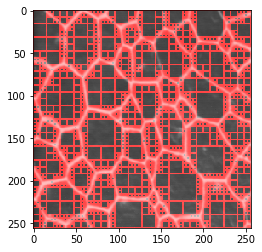

In [15]:
#Image prisme
h, w = prisme.shape
split_bruit_prisme = split(prisme,(0,0,h,w),predsplit1,15)
split_prof_bruit_prisme = splitprof__(split_bruit_prisme)
res = splitdraw(split_prof_bruit_prisme,prisme)
imshow(res)

coord (0, 0, 8, 8)
coord (0, 8, 8, 8)
coord (8, 0, 8, 8)
coord (8, 8, 8, 8)
coord (0, 16, 8, 8)
coord (0, 24, 4, 4)
coord (0, 28, 2, 2)
coord (0, 30, 2, 2)
coord (2, 28, 2, 2)
coord (2, 30, 2, 2)
coord (4, 24, 4, 4)
coord (4, 28, 2, 2)
coord (4, 30, 2, 2)
coord (6, 28, 2, 2)
coord (6, 30, 2, 2)
coord (8, 16, 8, 8)
coord (8, 24, 4, 4)
coord (8, 28, 2, 2)
coord (8, 30, 2, 2)
coord (10, 28, 2, 2)
coord (10, 30, 2, 2)
coord (12, 24, 2, 2)
coord (12, 26, 2, 2)
coord (14, 24, 2, 2)
coord (14, 26, 2, 2)
coord (12, 28, 2, 2)
coord (12, 30, 2, 2)
coord (14, 28, 2, 2)
coord (14, 30, 2, 2)
coord (16, 0, 8, 8)
coord (16, 8, 8, 8)
coord (24, 0, 8, 8)
coord (24, 8, 8, 8)
coord (16, 16, 8, 8)
coord (16, 24, 2, 2)
coord (16, 26, 2, 2)
coord (18, 24, 2, 2)
coord (18, 26, 2, 2)
coord (16, 28, 2, 2)
coord (16, 30, 2, 2)
coord (18, 28, 2, 2)
coord (18, 30, 2, 2)
coord (20, 24, 2, 2)
coord (20, 26, 2, 2)
coord (22, 24, 2, 2)
coord (22, 26, 2, 2)
coord (20, 28, 2, 2)
coord (20, 30, 2, 2)
coord (22, 28, 2, 2

coord (84, 34, 2, 2)
coord (86, 32, 2, 2)
coord (86, 34, 2, 2)
coord (84, 36, 2, 2)
coord (84, 38, 2, 2)
coord (86, 36, 2, 2)
coord (86, 38, 2, 2)
coord (80, 40, 2, 2)
coord (80, 42, 2, 2)
coord (82, 40, 2, 2)
coord (82, 42, 2, 2)
coord (80, 44, 2, 2)
coord (80, 46, 2, 2)
coord (82, 44, 2, 2)
coord (82, 46, 2, 2)
coord (84, 40, 2, 2)
coord (84, 42, 2, 2)
coord (86, 40, 2, 2)
coord (86, 42, 2, 2)
coord (84, 44, 2, 2)
coord (84, 46, 2, 2)
coord (86, 44, 2, 2)
coord (86, 46, 2, 2)
coord (88, 32, 2, 2)
coord (88, 34, 2, 2)
coord (90, 32, 2, 2)
coord (90, 34, 2, 2)
coord (88, 36, 2, 2)
coord (88, 38, 2, 2)
coord (90, 36, 2, 2)
coord (90, 38, 2, 2)
coord (92, 32, 2, 2)
coord (92, 34, 2, 2)
coord (94, 32, 2, 2)
coord (94, 34, 2, 2)
coord (92, 36, 2, 2)
coord (92, 38, 2, 2)
coord (94, 36, 2, 2)
coord (94, 38, 2, 2)
coord (88, 40, 4, 4)
coord (88, 44, 4, 4)
coord (92, 40, 4, 4)
coord (92, 44, 4, 4)
coord (80, 48, 2, 2)
coord (80, 50, 2, 2)
coord (82, 48, 2, 2)
coord (82, 50, 2, 2)
coord (80, 52

coord (102, 120, 2, 2)
coord (102, 122, 2, 2)
coord (100, 124, 4, 4)
coord (104, 112, 4, 4)
coord (104, 116, 2, 2)
coord (104, 118, 2, 2)
coord (106, 116, 2, 2)
coord (106, 118, 2, 2)
coord (108, 112, 4, 4)
coord (108, 116, 2, 2)
coord (108, 118, 2, 2)
coord (110, 116, 2, 2)
coord (110, 118, 2, 2)
coord (104, 120, 2, 2)
coord (104, 122, 2, 2)
coord (106, 120, 2, 2)
coord (106, 122, 2, 2)
coord (104, 124, 4, 4)
coord (108, 120, 2, 2)
coord (108, 122, 2, 2)
coord (110, 120, 2, 2)
coord (110, 122, 2, 2)
coord (108, 124, 4, 4)
coord (112, 96, 8, 8)
coord (112, 104, 4, 4)
coord (112, 108, 4, 4)
coord (116, 104, 4, 4)
coord (116, 108, 2, 2)
coord (116, 110, 2, 2)
coord (118, 108, 2, 2)
coord (118, 110, 2, 2)
coord (120, 96, 8, 8)
coord (120, 104, 4, 4)
coord (120, 108, 2, 2)
coord (120, 110, 2, 2)
coord (122, 108, 2, 2)
coord (122, 110, 2, 2)
coord (124, 104, 2, 2)
coord (124, 106, 2, 2)
coord (126, 104, 2, 2)
coord (126, 106, 2, 2)
coord (124, 108, 2, 2)
coord (124, 110, 2, 2)
coord (126, 1

coord (60, 240, 4, 4)
coord (60, 244, 2, 2)
coord (60, 246, 2, 2)
coord (62, 244, 2, 2)
coord (62, 246, 2, 2)
coord (56, 248, 8, 8)
coord (64, 128, 16, 16)
coord (64, 144, 16, 16)
coord (80, 128, 2, 2)
coord (80, 130, 2, 2)
coord (82, 128, 2, 2)
coord (82, 130, 2, 2)
coord (80, 132, 2, 2)
coord (80, 134, 2, 2)
coord (82, 132, 2, 2)
coord (82, 134, 2, 2)
coord (84, 128, 2, 2)
coord (84, 130, 2, 2)
coord (86, 128, 2, 2)
coord (86, 130, 2, 2)
coord (84, 132, 2, 2)
coord (84, 134, 2, 2)
coord (86, 132, 2, 2)
coord (86, 134, 2, 2)
coord (80, 136, 2, 2)
coord (80, 138, 2, 2)
coord (82, 136, 2, 2)
coord (82, 138, 2, 2)
coord (80, 140, 4, 4)
coord (84, 136, 2, 2)
coord (84, 138, 2, 2)
coord (86, 136, 2, 2)
coord (86, 138, 2, 2)
coord (84, 140, 4, 4)
coord (88, 128, 4, 4)
coord (88, 132, 4, 4)
coord (92, 128, 4, 4)
coord (92, 132, 4, 4)
coord (88, 136, 8, 8)
coord (80, 144, 4, 4)
coord (80, 148, 4, 4)
coord (84, 144, 4, 4)
coord (84, 148, 4, 4)
coord (80, 152, 4, 4)
coord (80, 156, 4, 4)
coord 

coord (112, 232, 4, 4)
coord (112, 236, 2, 2)
coord (112, 238, 2, 2)
coord (114, 236, 2, 2)
coord (114, 238, 2, 2)
coord (116, 232, 2, 2)
coord (116, 234, 2, 2)
coord (118, 232, 2, 2)
coord (118, 234, 2, 2)
coord (116, 236, 2, 2)
coord (116, 238, 2, 2)
coord (118, 236, 2, 2)
coord (118, 238, 2, 2)
coord (120, 224, 4, 4)
coord (120, 228, 4, 4)
coord (124, 224, 4, 4)
coord (124, 228, 4, 4)
coord (120, 232, 2, 2)
coord (120, 234, 2, 2)
coord (122, 232, 2, 2)
coord (122, 234, 2, 2)
coord (120, 236, 2, 2)
coord (120, 238, 2, 2)
coord (122, 236, 2, 2)
coord (122, 238, 2, 2)
coord (124, 232, 4, 4)
coord (124, 236, 2, 2)
coord (124, 238, 2, 2)
coord (126, 236, 2, 2)
coord (126, 238, 2, 2)
coord (112, 240, 16, 16)
coord (128, 0, 4, 4)
coord (128, 4, 4, 4)
coord (132, 0, 4, 4)
coord (132, 4, 4, 4)
coord (128, 8, 4, 4)
coord (128, 12, 2, 2)
coord (128, 14, 2, 2)
coord (130, 12, 2, 2)
coord (130, 14, 2, 2)
coord (132, 8, 2, 2)
coord (132, 10, 2, 2)
coord (134, 8, 2, 2)
coord (134, 10, 2, 2)
coord 

coord (206, 44, 2, 2)
coord (206, 46, 2, 2)
coord (192, 48, 16, 16)
coord (208, 32, 16, 16)
coord (208, 48, 16, 16)
coord (224, 0, 8, 8)
coord (224, 8, 4, 4)
coord (224, 12, 4, 4)
coord (228, 8, 4, 4)
coord (228, 12, 4, 4)
coord (232, 0, 8, 8)
coord (232, 8, 8, 8)
coord (224, 16, 4, 4)
coord (224, 20, 2, 2)
coord (224, 22, 2, 2)
coord (226, 20, 2, 2)
coord (226, 22, 2, 2)
coord (228, 16, 4, 4)
coord (228, 20, 2, 2)
coord (228, 22, 2, 2)
coord (230, 20, 2, 2)
coord (230, 22, 2, 2)
coord (224, 24, 8, 8)
coord (232, 16, 4, 4)
coord (232, 20, 4, 4)
coord (236, 16, 4, 4)
coord (236, 20, 2, 2)
coord (236, 22, 2, 2)
coord (238, 20, 2, 2)
coord (238, 22, 2, 2)
coord (232, 24, 4, 4)
coord (232, 28, 4, 4)
coord (236, 24, 2, 2)
coord (236, 26, 2, 2)
coord (238, 24, 2, 2)
coord (238, 26, 2, 2)
coord (236, 28, 4, 4)
coord (240, 0, 8, 8)
coord (240, 8, 8, 8)
coord (248, 0, 8, 8)
coord (248, 8, 8, 8)
coord (240, 16, 4, 4)
coord (240, 20, 2, 2)
coord (240, 22, 2, 2)
coord (242, 20, 2, 2)
coord (242, 2

coord (152, 216, 4, 4)
coord (152, 220, 4, 4)
coord (156, 216, 2, 2)
coord (156, 218, 2, 2)
coord (158, 216, 2, 2)
coord (158, 218, 2, 2)
coord (156, 220, 4, 4)
coord (128, 224, 16, 16)
coord (128, 240, 4, 4)
coord (128, 244, 4, 4)
coord (132, 240, 2, 2)
coord (132, 242, 2, 2)
coord (134, 240, 2, 2)
coord (134, 242, 2, 2)
coord (132, 244, 4, 4)
coord (128, 248, 8, 8)
coord (136, 240, 2, 2)
coord (136, 242, 2, 2)
coord (138, 240, 2, 2)
coord (138, 242, 2, 2)
coord (136, 244, 4, 4)
coord (140, 240, 2, 2)
coord (140, 242, 2, 2)
coord (142, 240, 2, 2)
coord (142, 242, 2, 2)
coord (140, 244, 4, 4)
coord (136, 248, 8, 8)
coord (144, 224, 8, 8)
coord (144, 232, 8, 8)
coord (152, 224, 8, 8)
coord (152, 232, 8, 8)
coord (144, 240, 2, 2)
coord (144, 242, 2, 2)
coord (146, 240, 2, 2)
coord (146, 242, 2, 2)
coord (144, 244, 2, 2)
coord (144, 246, 2, 2)
coord (146, 244, 2, 2)
coord (146, 246, 2, 2)
coord (148, 240, 4, 4)
coord (148, 244, 2, 2)
coord (148, 246, 2, 2)
coord (150, 244, 2, 2)
coord (15

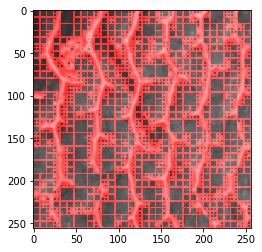

In [16]:
#Image seiche
h, w = seiche.shape
split_bruit_seiche = split(seiche,(0,0,h,w),predsplit1,9)
split_prof_bruit_seiche = splitprof__(split_bruit_seiche)
res = splitdraw(split_prof_bruit_seiche,seiche)
imshow(res)

Question 2 (bonus): proposer un critère de découpage alternatif. Par exemple, un critère basé sur des contours ou un autre. Le critère peut être adapté à chaque type d'image.
